Condition number for the first case: 5.67583653756e+15
Condition number for the second case: 46922311139.8
Condition number for the third case: 155406.290341


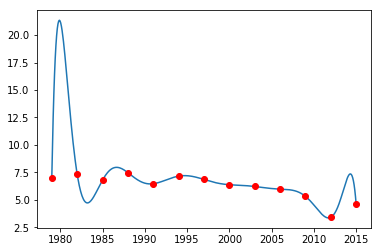

[  6.62623020e+00  -3.63072317e+00   1.01450815e+01   4.18132057e+01
  -2.31844985e+02  -1.63758809e+02   1.46278133e+03   1.10087990e+02
  -3.81497983e+03   2.49178286e+02   4.30371977e+03  -2.55729413e+02
  -1.73723919e+03]


In [15]:
import numpy as np
import matplotlib.pyplot as plt

##PROJECT SUGGESTION 2
#Initialize the data points, t denotes the year, s the sea ice in million square kilometers
t = [1979, 1982, 1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015]
s = [7.00, 7.34, 6.79, 7.47, 6.46, 7.15, 6.85, 6.37, 6.21, 5.97, 5.31, 3.40, 4.59]

#J is computed given the number of data points (13)
J = 13

#Computing the Vandermonde matrices for each case of the given basis functions, the increasing parameter is set to
#True in order for the columns to be at x^0, x^1, ..., x^(N-1) form
a = np.vander(t, J, increasing=True)
b = np.vander([x - 1978 for x in t], J, increasing=True)
c = np.vander([(x - 1998)/18 for x in t], J, increasing=True)

#Computing the condition number for each case
cond_a = np.linalg.cond(a)
cond_b = np.linalg.cond(b)
cond_c = np.linalg.cond(c)

#Print the condition numbers. We observe that the smallest number is for the third case, 
#thus it'll be our choice as a basis function.
print('Condition number for the first case:', cond_a)
print('Condition number for the second case:', cond_b)
print('Condition number for the third case:', cond_c)

##PROJECT SUGGESTION 3
#Compute the coefficients for the interpolation function
coeff = np.linalg.solve(c,s)


def inter_func(t_i, J, coeff):
    out = 0
    for j in range(J):
        out = out + pow((t_i - 1998) / 18.0, j ) * coeff[j]

    return out

t_updated = np.linspace(1979, 2015, 444)

#Plot data points and function
plt.plot(t_updated, [inter_func(t_i, J, coeff) for t_i in t_updated], t, s, 'ro')
plt.show()

print(coeff)
